<a href="https://colab.research.google.com/github/kpsahu1/rl/blob/main/grid_world_monte_carlo_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 1 ( Solving Grid World Problem with Monte-Carlo Methods )**

##**Inputs:**

* Non-Terminating States :  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14
* Terminating State     :  0

```
---------------------------------
|   0   |   1   |   2   |   3   |
---------------------------------
|   4   |   5   |   6   |   7   |
---------------------------------
|   8   |   9   |   10  |   11  |
---------------------------------
|   12  |   13  |   14  |   0   |
---------------------------------
```
* Determinestic Policy:

```
------------------------------------------
|  ---   |   left  |   left   |   left   |
------------------------------------------
|   up   |    up   |   down   |   down   |
------------------------------------------
|   up   |    up   |   down   |   down   |
------------------------------------------
|   up   |  right  |   right  |    ---   |
------------------------------------------
```


* Discount Factor ( gamma ) = 1 [ Episodic Task ]

In [ ]:
GAMMA = 1

* Reward on all trasitions until termination = -1

In [ ]:
R = -1

* Probability of Transitions from current state to next state:

In [ ]:
import random
import numpy as np

def find_next_state (current_state):

  next_state = np.zeros([15])
 
  ## considering the only valid actions because of determinestic policy
  ## next_state[current_state]

  # interior states
  next_state[5] = random.choices([1, 4, 6, 9],     weights=(0.7, 0.1, 0.1, 0.1))[0]   ; # up action
  next_state[6] = random.choices([10, 5, 2, 7],    weights=(0.7, 0.1, 0.1, 0.1))[0]   ; # down action
  next_state[9] = random.choices([5, 8, 13, 10],   weights=(0.7, 0.1, 0.1, 0.1))[0]   ; # up action
  next_state[10] = random.choices([14, 9, 6, 11],  weights=(0.7, 0.1, 0.1, 0.1))[0]   ; # down action

  # boundary states
  next_state[1] = random.choices([0, 1, 2, 5],     weights=(0.7, 0.1, 0.1, 0.1))[0]   ; # left action
  next_state[2] = random.choices([1, 2, 6, 3],     weights=(0.7, 0.1, 0.1, 0.1))[0]   ; # left action
  next_state[4] = random.choices([0, 4, 5, 8],     weights=(0.7, 0.1, 0.1, 0.1))[0]   ; # up action
  next_state[7] = random.choices([11, 7, 6, 3],    weights=(0.7, 0.1, 0.1, 0.1))[0]   ; # down action
  next_state[8] = random.choices([4, 8, 9, 12],    weights=(0.7, 0.1, 0.1, 0.1))[0]   ; # up action
  next_state[11] = random.choices([0, 11, 7, 10],  weights=(0.7, 0.1, 0.1, 0.1))[0]   ; # down action
  next_state[13] = random.choices([14, 13, 9, 12], weights=(0.7, 0.1, 0.1, 0.1))[0]   ; # right action
  next_state[14] = random.choices([0, 14, 10, 13], weights=(0.7, 0.1, 0.1, 0.1))[0]   ; # right action

  # corner states
  next_state[3] = random.choices([2, 7, 3],    weights=(0.7, 0.1, 0.2))[0]            ; # left action
  next_state[12] = random.choices([8, 13, 12], weights=(0.7, 0.1, 0.2))[0]            ; # up action

  return int(next_state[current_state])

* Exploring starts over values ( picking an initial state randomly with equal probability ):

In [ ]:
def find_initial_state():
  states = list(range(1,15))
  return int(random.choices(states)[0])

## **Creating empty value functions:**

In [ ]:
value_function_first_visit = { 1 : [], 2 : [], 3 : [], 4 : [], 5 : [], 6 : [], 7 : [], 8 : [], 9 : [], 10 : [], 11 : [], 12 : [], 13 : [], 14 : [] }
value_function_every_visit = { 1 : [], 2 : [], 3 : [], 4 : [], 5 : [], 6 : [], 7 : [], 8 : [], 9 : [], 10 : [], 11 : [], 12 : [], 13 : [], 14 : [] }

#value_function[1].append(2)
#value_function[1].append(4)
#print(value_function)
def clear_value_functions ():
  value_function_first_visit = { 1 : [], 2 : [], 3 : [], 4 : [], 5 : [], 6 : [], 7 : [], 8 : [], 9 : [], 10 : [], 11 : [], 12 : [], 13 : [], 14 : [] }
  value_function_every_visit = { 1 : [], 2 : [], 3 : [], 4 : [], 5 : [], 6 : [], 7 : [], 8 : [], 9 : [], 10 : [], 11 : [], 12 : [], 13 : [], 14 : [] }

##**First Visit Method:**

In [ ]:
def first_visit_method(trajectory):
  for i in range(len(trajectory)-1):
      v = 0
      if ( trajectory[i] not in  trajectory[0:i] ):
        for j in range(i, len(trajectory)-1):
          v += R ; #since GAMMA is 1
        value_function_first_visit[trajectory[i]].append(v)
  # print(value_function_first_visit)

##**Every Visit Method:**

In [ ]:
def every_visit_method(trajectory):
  for i in range(len(trajectory)-1):
      v = 0
      for j in range(i, len(trajectory)-1):
        v += R ; #since GAMMA is 1
      value_function_every_visit[trajectory[i]].append(v)
  # print(value_function_every_visit)
      

##**Taking average of values:**

In [ ]:
def calculate_average(lst):
    return sum(lst) / len(lst)

def average_values():
  first_visit_xs = []
  first_visit_ys = []
  for i in value_function_first_visit.keys():
    if ( len(value_function_first_visit[i]) > 0 ):
      avg = calculate_average(value_function_first_visit[i])
      #print(i, avg)
      first_visit_xs.append(i)
      first_visit_ys.append(avg)
  every_visit_xs = []
  every_visit_ys = []
  for i in value_function_every_visit.keys():
    if ( len(value_function_every_visit[i]) > 0 ):
      avg = calculate_average(value_function_every_visit[i])
      #print(i, avg)
      every_visit_xs.append(i)
      every_visit_ys.append(avg)
  return first_visit_xs, first_visit_ys, every_visit_xs, every_visit_ys

#average_values()

## **Main Function:**

Printing first 5 trajectories only:
(1)	2 -> 1 -> 0
(2)	1 -> 0
(3)	10 -> 14 -> 14 -> 14 -> 10 -> 14 -> 0
(4)	4 -> 0
(5)	5 -> 6 -> 7 -> 7 -> 11 -> 7 -> 11 -> 11 -> 0


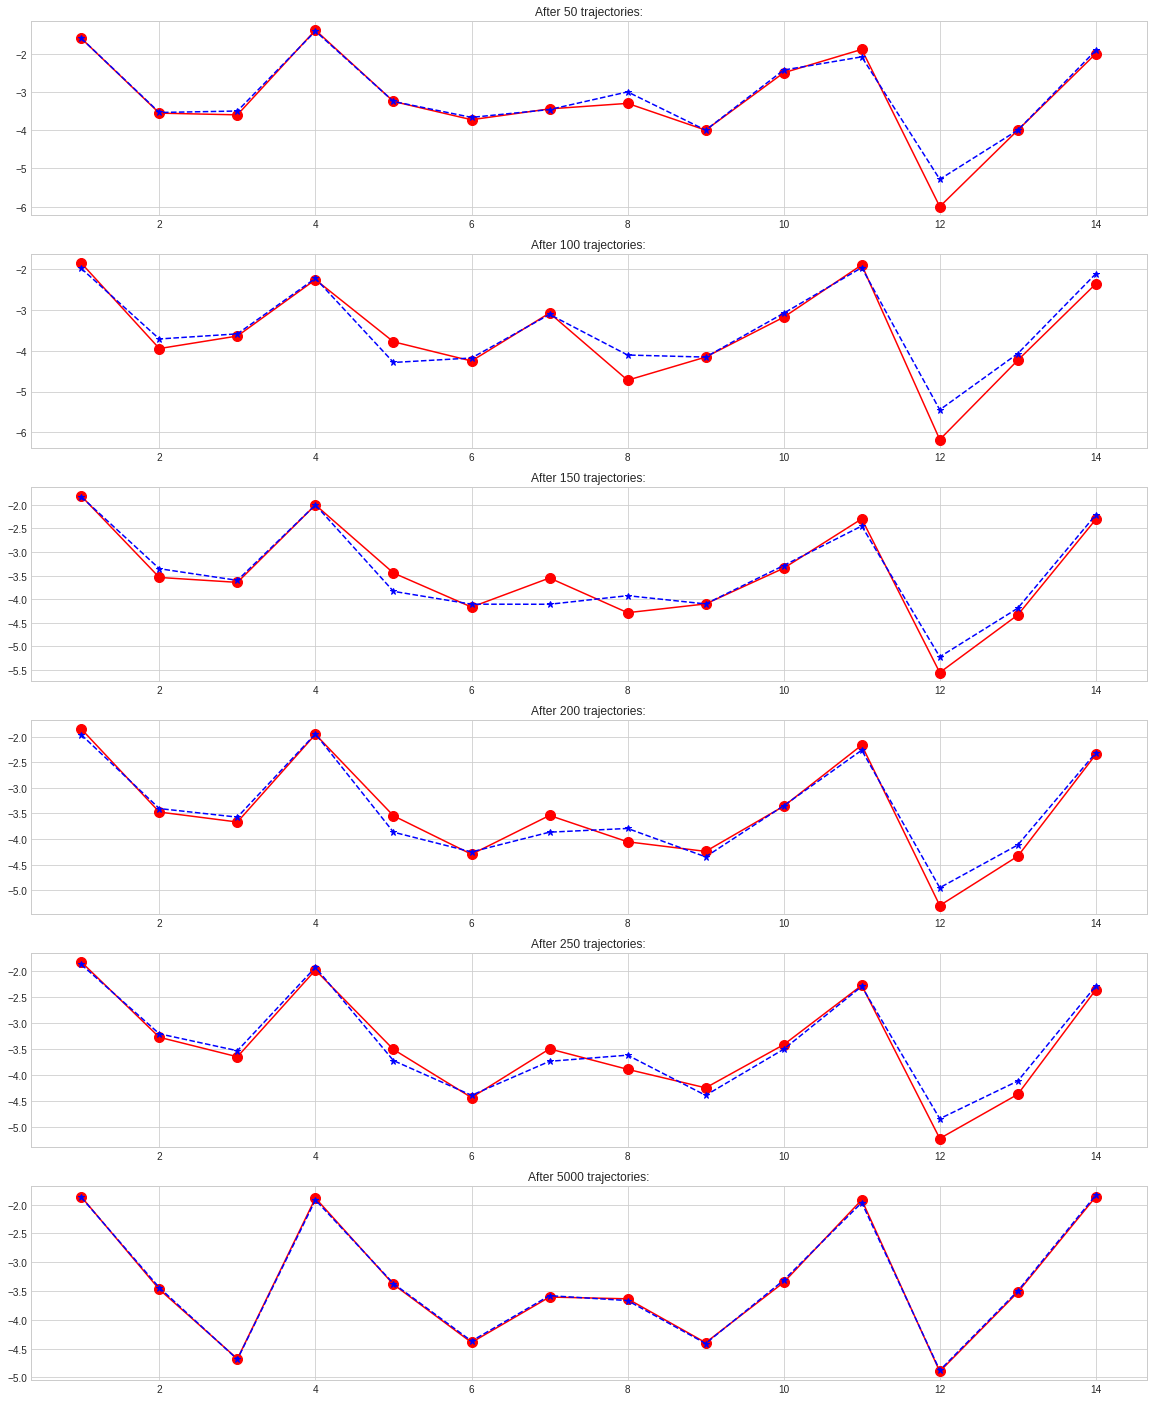

In [ ]:
import matplotlib.pyplot as plt

if __name__ == "__main__":

    clear_value_functions()

    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(20, 25))  
   
    plot_count_y = 0
    print("Printing first 5 trajectories only:")

    max_no_of_trajectories = 5000
    
    for t in range(0,max_no_of_trajectories):

        plot_count_x = 0
        ## exploring starts over values
        current_state = find_initial_state()

        trajectory = []
        for i in range(0,20):
          trajectory.append(current_state)
          next_state = find_next_state(current_state)
          current_state = next_state
          if (current_state == 0):
            trajectory.append(current_state)
            break

        first_visit_method(trajectory)
        every_visit_method(trajectory)

        ## printing only first 10 trajectories
        if (t < 5):
          print( "(" + str(t+1) + ")\t" + " -> ".join(map(str, trajectory)))
        
        if ( (t+1) % 50 == 0 and t < 250  or (t+1) == max_no_of_trajectories ):
          # print("t:" + str(t))
          #print(value_function_every_visit)
          #print(value_function_first_visit)
          x1, y1, x2, y2 = average_values()
          axes[plot_count_y].plot(x1,y1, '-r', marker = 'o', markersize=10, label='first_visit_method')
          axes[plot_count_y].plot(x1,y2, '--b', marker = '*', markersize=7, label='every_visit_method')
          axes[plot_count_y].set_title("After " + str(t+1) + " trajectories:")
          #plot_count_x += 1
          #axes[plot_count_y, plot_count_x].plot(x2,y2)
          plot_count_y += 1
    plt.style.use('seaborn-whitegrid')
    plt.show()


* Red Line :   First Visit Method
* Blue Line:   Every Visit Method